In [1]:
# vamos a mejorar las predicciones de antes

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from prophet import Prophet


In [3]:
df = pd.read_csv('../data/Bike_Sharing_Demand.csv',parse_dates = True)

In [4]:

def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    #print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [5]:
df = df.rename(columns={'datetime': 'ds', 'count': 'y'})

In [6]:
validate = df[['ds','y']].tail(48)

In [7]:
df.drop(df[['ds','y']].tail(48).index,inplace=True)

In [8]:
train = df[['ds','y']]

In [9]:
train.head()

,ds,y
0,2011-01-01 00:00:00,16
1,2011-01-01 01:00:00,40
2,2011-01-01 02:00:00,32
3,2011-01-01 03:00:00,13
4,2011-01-01 04:00:00,1


In [10]:
# voy a ver si el logaritmo mejora el modelo predictivo o lo mejora
# esto lo hacemos por un tema de varianza
train['y'] = np.log(train['y'])

/var/folders/3q/zfn8yb513nj10ry8w8r8_jmc0000gn/T/ipykernel_1411/3703596856.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y'] = np.log(train['y'])


In [11]:
m = Prophet(yearly_seasonality=False)
m.fit(train)

Initial log joint probability = -417.302
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       20060.5    0.00482122       423.248       1.889      0.1889      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199         20074    0.00174007       176.737         0.9         0.9      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       20083.8   8.38881e-05       168.862   4.002e-07       0.001      375  LS failed, Hessian reset 
     299       20085.2    0.00193449       345.032           1           1      402   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       20085.8    9.4338e-05        116.39   2.655e-07       0.001      457  LS failed, Hessian reset 
     399       20086.4   0.000134155       87.4677           1           1      569   
    Iter      log pro

In [12]:
p = 48
future = m.make_future_dataframe(periods=p,freq='H',include_history=False)

forecast = m.predict(future)

In [13]:
# inverse log the results
# calculamos la inversa
forecast['yhat'] = np.exp(forecast['yhat'])   

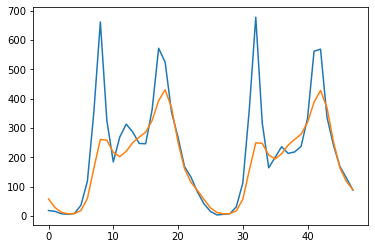

In [14]:
#forecast.yhat.plot()
plt.plot(list(validate.y))
plt.plot(list(forecast.yhat))
# vemos que no mejora

In [15]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-12-18 00:00:00,4.790430,3.188071,4.914080,4.790430,4.790430,-0.736289,-0.736289,-0.736289,-0.668869,-0.668869,-0.668869,-0.067419,-0.067419,-0.067419,0.0,0.0,0.0,57.635620
1,2012-12-18 01:00:00,4.790331,2.550511,4.172693,4.790331,4.790331,-1.455012,-1.455012,-1.455012,-1.390060,-1.390060,-1.390060,-0.064952,-0.064952,-0.064952,0.0,0.0,0.0,28.087344
2,2012-12-18 02:00:00,4.790233,1.710722,3.340009,4.790233,4.790233,-2.314430,-2.314430,-2.314430,-2.251623,-2.251623,-2.251623,-0.062806,-0.062806,-0.062806,0.0,0.0,0.0,11.891253
3,2012-12-18 03:00:00,4.790134,1.067041,2.744840,4.790134,4.790134,-2.886962,-2.886962,-2.886962,-2.825959,-2.825959,-2.825959,-0.061003,-0.061003,-0.061003,0.0,0.0,0.0,6.707137
4,2012-12-18 04:00:00,4.790036,1.178349,2.816156,4.790036,4.790036,-2.769535,-2.769535,-2.769535,-2.709978,-2.709978,-2.709978,-0.059557,-0.059557,-0.059557,0.0,0.0,0.0,7.542099


In [16]:

timeseries_evaluation_metrics_func(validate.y,forecast['yhat'])

MSE is : 11737.26783087753
MAE is : 59.44788080234835
RMSE is : 108.33867190840735
MAPE is : 35.587263126301345
R2 is : 0.6457128419485039



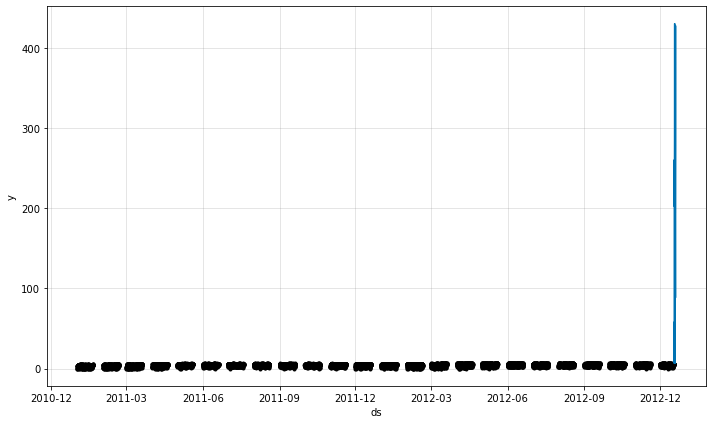

In [17]:
fig1 = m.plot(forecast)

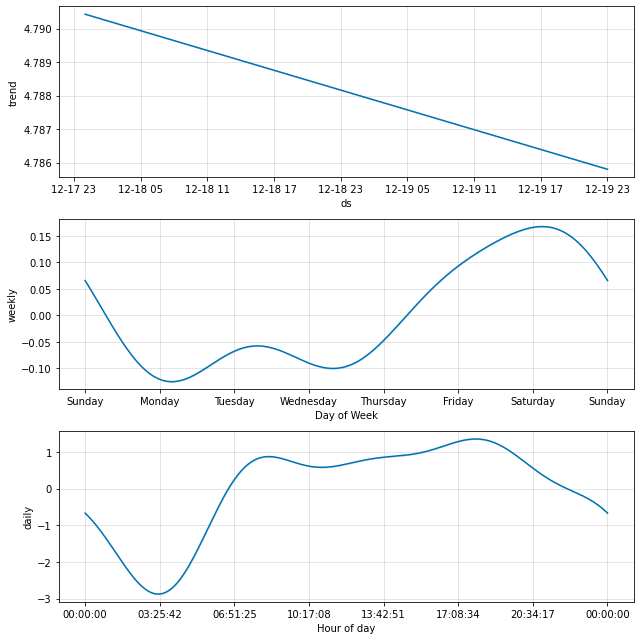

In [18]:
fig2 = m.plot_components(forecast)

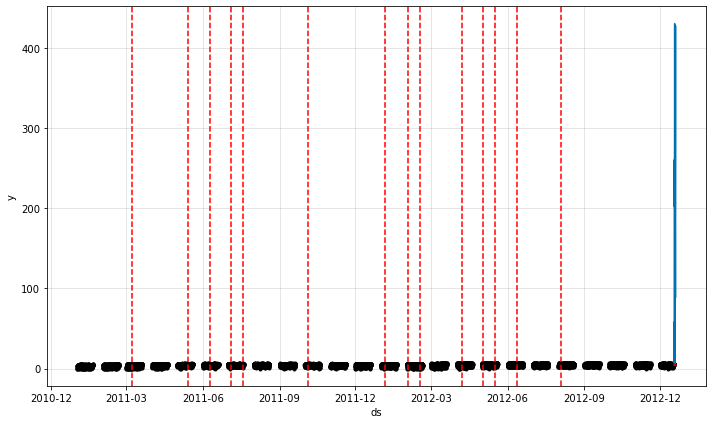

In [19]:
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# conclusión: el loaritmo no mejora el modelo 1 que teníamos hecho